# Exploring the phase space of a jet: 1-D Unfolding  (for now)

## Unfolding the standard, and a novel, $N$-subjettiness ratio in semileptonic $t\bar{t}$ events at $\sqrt{s} = 13$ TeV

#### Firstly , import the ROOT data analysis framework which will be used to read the data files and unfold the final result. 

In [1]:
import ROOT
import array as array
import os
import glob
import ROOT
from ROOT import TH1D, TH2D, TTree,TFile
from random import gauss
import numpy as np
import root_numpy as rtnpy
import h5py
from awkward import JaggedArray, Table
import matplotlib.pyplot as plt
import seaborn as sns

Welcome to JupyROOT 6.18/00


In [2]:
lumi = 5.75+2.57+4.24+4.03+3.11+7.57+8.65 #B+C+D+E+F+G+H
print "2016 Single Muon dataset luminosity:%0.2f"%(lumi)

2016 Single Muon dataset luminosity:35.92


In [3]:
systs = ['Jmr', 'Jms', 'pileup', 'JesTotal', 'Lumi', 'lhaPDF', 'Jer']

uncert_colors = [ 4 ,  4 , ROOT.kCyan +1 ,2 ,      ROOT.kYellow+3,    ROOT.kMagenta ,  2 , ROOT.kBlack ,ROOT.kBlack ,    ROOT.kCyan +3 , ROOT.kViolet+3 ,  ROOT.kAzure+2 , ROOT.kMagenta+1 ,ROOT.kViolet+3 ,  ROOT.kRed ,   ROOT.kCyan +3 , ROOT.kViolet+3 ,  ROOT.kAzure+2 , ROOT.kMagenta+1 ,   ROOT.kCyan +3 , ROOT.kViolet+3 ,  ROOT.kAzure+2 , ROOT.kMagenta+1 ,ROOT.kViolet+3 ,  ROOT.kRed ,   ROOT.kCyan +3 , ROOT.kViolet+3 ,  ROOT.kAzure+2 , ROOT.kMagenta+1 ]
uncert_lines = [ 5,8,7,3,    5,    6,8,1, 2, 4, 5, 1, 7, 8, 1, 7,7,4,4,5,2,1,3, 2, 4, 5, 1, 7, 8, 1]

#### Below the MC and Data events are read from ROOT trees which only contain events meeting the selection criteria set forth in this __[script](https://github.com/kaustuvdatta/jetObservables/blob/102X/python/nSubProducer_gen_reco.py)__ and thereafter in the nSubExtractor class

In [4]:
from nSubExtractor import nSubExtractor

### Loading datasets of $N$-subjettiness bases measured with (default: " " ) $E$-scheme recombination and excl. lT axes (please specifiy  "WTA_kT" or "OP_kT" in the axisdef option of the nSubExtractor)

In [5]:
a = nSubExtractor(isMC=1, axisdef="", sample="TTbar/2")
TTbarMG_dataset, TTbarMG_reco_nSub_basis, TTbarMG_gen_nSub_basis, TTbarMG_weights = a.sample_loader()

print TTbarMG_reco_nSub_basis.shape, TTbarMG_weights.shape

(6270, 21) (6270, 2)


Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


In [6]:
a = nSubExtractor(isMC=1, axisdef="", sample="TTbar/1")
TTbar_dataset, TTbar_reco_nSub_basis, TTbar_gen_nSub_basis, TTbar_weights  = a.sample_loader()

print TTbar_reco_nSub_basis.shape, TTbar_weights.shape

(43107, 21) (43107, 2)


In [7]:
a = nSubExtractor(isMC=1, axisdef="", sample="ST/1")
ST1_dataset, ST1_reco_nSub_basis, ST1_gen_nSub_basis, ST1_weights  = a.sample_loader()
print ST1_reco_nSub_basis.shape, ST1_weights.shape

(900, 21) (900, 2)


In [8]:
a = nSubExtractor(isMC=1, axisdef="", sample="ST/2")
ST2_dataset, ST2_reco_nSub_basis, ST2_gen_nSub_basis, ST2_weights  = a.sample_loader()
print ST2_reco_nSub_basis.shape, ST2_weights.shape

(1988, 21) (1988, 2)


In [9]:
a = nSubExtractor(isMC=1, axisdef="", sample="ST/3")
ST3_dataset, ST3_reco_nSub_basis, ST3_gen_nSub_basis, ST3_weights  = a.sample_loader()
print ST3_reco_nSub_basis.shape, ST3_weights.shape

(594, 21) (594, 2)


In [10]:
a = nSubExtractor(isMC=1, axisdef="", sample="ST/4")
ST4_dataset, ST4_reco_nSub_basis, ST4_gen_nSub_basis, ST4_weights  = a.sample_loader()
print ST4_reco_nSub_basis.shape, ST4_weights.shape

(617, 21) (617, 2)


In [11]:
a = nSubExtractor(isMC=1, axisdef="", sample="ST/5")
ST5_dataset, ST5_reco_nSub_basis, ST5_gen_nSub_basis, ST5_weights  = a.sample_loader()
print ST5_reco_nSub_basis.shape, ST5_weights.shape

(69, 21) (69, 2)


In [12]:
a = nSubExtractor(isMC=1, axisdef="", sample="Wjets/2")
Wjets_dataset, Wjets_reco_nSub_basis, Wjets_gen_nSub_basis, Wjets_weights = a.sample_loader()
print Wjets_reco_nSub_basis.shape, Wjets_weights.shape

(207, 21) (207, 3)


In [13]:
a = nSubExtractor(isMC=0, axisdef="", sample="Data")
data_dataset, data_nSub_basis,  = a.sample_loader()
print data_nSub_basis.shape

(16482, 21)


In [14]:
weight_ST1 = (80.95*0.322*lumi*1000.)/(38811017.)*np.ones(ST1_weights.shape[0])*ST1_weights[:,0]*ST1_weights[:,1]*0.8
weight_ST2 = (0.322*136.02*lumi*1000.)/(66960888.)*np.ones(ST2_weights.shape[0])*ST2_weights[:,0]*ST2_weights[:,1]*0.8
weight_ST3 = (35.6*lumi*1000.)/(998276.)*np.ones(ST3_weights.shape[0])*ST3_weights[:,0]*ST3_weights[:,1]*0.8
weight_ST4 = (35.6*lumi*1000.)/(992024.)*np.ones(ST4_weights.shape[0])*ST4_weights[:,0]*ST4_weights[:,1]*0.8
weight_ST5 = (10.12*lumi*1000.)/(2989199.)*np.ones(ST5_weights.shape[0])*ST5_weights[:,0]*ST5_weights[:,1]*0.8
weight_TTbar = (831.76*lumi*1000.)/76915549.*np.ones(TTbar_weights.shape[0])*TTbar_weights[:,0]*TTbar_weights[:,1]*0.8
weight_Wjets = ((60781.5*lumi*1000.)*(Wjets_weights[:,2]/abs(Wjets_weights[:,2][0]))/158307515.0)*Wjets_weights[:,0]*Wjets_weights[:,1]*0.8 
weight_data = 1.0*np.ones(data_nSub_basis.shape[0])

#print lumi, weight_Wjets
#print TTbar_weights[:,0]

In [15]:
lenW = Wjets_reco_nSub_basis.shape[0]
lenST = ST1_reco_nSub_basis.shape[0]+ST1_reco_nSub_basis.shape[0]+ST2_reco_nSub_basis.shape[0]+ST4_reco_nSub_basis.shape[0]+ST5_reco_nSub_basis.shape[0]
lenbkg = lenW+lenST
print lenbkg

4681


In [16]:
bkg_reco_nSub_basis = np.concatenate((Wjets_reco_nSub_basis, ST1_reco_nSub_basis, ST2_reco_nSub_basis, ST3_reco_nSub_basis, ST4_reco_nSub_basis, ST5_reco_nSub_basis))

In [17]:
lenW = Wjets_gen_nSub_basis.shape[0]
lenST = ST1_gen_nSub_basis.shape[0]+ST1_gen_nSub_basis.shape[0]+ST2_gen_nSub_basis.shape[0]+ST4_gen_nSub_basis.shape[0]+ST5_gen_nSub_basis.shape[0]
lenbkg = lenW+lenST
print lenbkg

4681


In [18]:
bkg_gen_nSub_basis = np.concatenate((Wjets_gen_nSub_basis, ST1_gen_nSub_basis, ST2_gen_nSub_basis, ST3_gen_nSub_basis, ST4_gen_nSub_basis, ST5_gen_nSub_basis))

In [19]:
Wjets_gen_tau21 = Wjets_gen_nSub_basis[:,4]/Wjets_gen_nSub_basis[:,1]

ST1_gen_tau21 = ST1_gen_nSub_basis[:,4]/ST1_gen_nSub_basis[:,1]

ST2_gen_tau21 = ST2_gen_nSub_basis[:,4]/ST2_gen_nSub_basis[:,1]

ST3_gen_tau21 = ST3_gen_nSub_basis[:,4]/ST3_gen_nSub_basis[:,1]

ST4_gen_tau21 = ST4_gen_nSub_basis[:,4]/ST4_gen_nSub_basis[:,1]

ST5_gen_tau21 = ST5_gen_nSub_basis[:,4]/ST5_gen_nSub_basis[:,1]

TTbar_gen_tau21 = TTbar_gen_nSub_basis[:,4]/TTbar_gen_nSub_basis[:,1]

In [20]:
Wjets_reco_tau21 = Wjets_reco_nSub_basis[:,4]/Wjets_reco_nSub_basis[:,1]

ST1_reco_tau21 = ST1_reco_nSub_basis[:,4]/ST1_reco_nSub_basis[:,1]

ST2_reco_tau21 = ST2_reco_nSub_basis[:,4]/ST2_reco_nSub_basis[:,1]

ST3_reco_tau21 = ST3_reco_nSub_basis[:,4]/ST3_reco_nSub_basis[:,1]

ST4_reco_tau21 = ST4_reco_nSub_basis[:,4]/ST4_reco_nSub_basis[:,1]

ST5_reco_tau21 = ST5_reco_nSub_basis[:,4]/ST5_reco_nSub_basis[:,1]

TTbar_reco_tau21 = TTbar_reco_nSub_basis[:,4]/TTbar_reco_nSub_basis[:,1]

### cursory comparison of data/MC for $\tau_{2,1}$
i.e., check if the samples collected above make sense

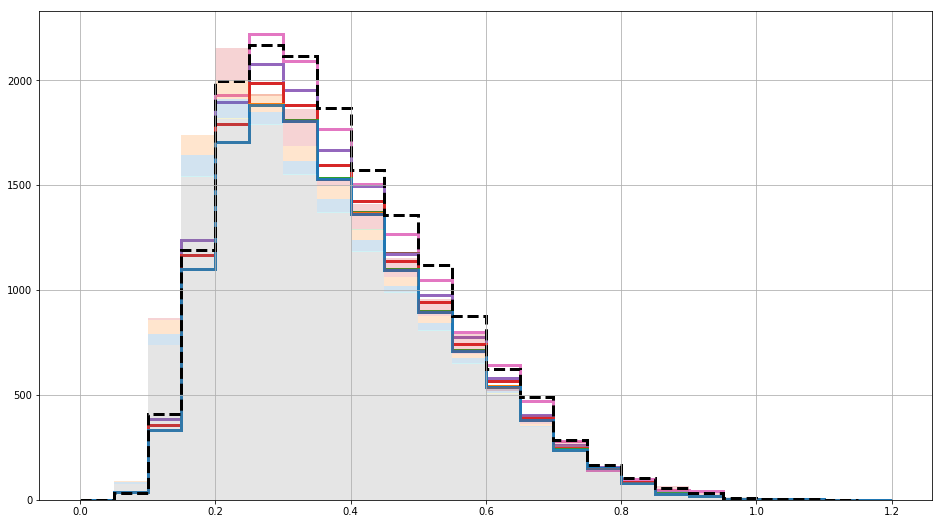

In [21]:
plt.figure(figsize=(16,9))
plt.hist([TTbar_reco_tau21, ST1_reco_tau21, ST2_reco_tau21, ST3_reco_tau21, ST4_reco_tau21, ST5_reco_tau21, Wjets_reco_tau21], weights=[weight_TTbar,weight_ST1,weight_ST2,weight_ST3,weight_ST4,weight_ST5,weight_Wjets], histtype='step', lw=3, bins=np.arange(0.,1.25,0.05) , stacked=True)
plt.hist([TTbar_gen_tau21, ST1_gen_tau21, ST2_gen_tau21, ST3_gen_tau21, ST4_gen_tau21, ST5_gen_tau21, Wjets_gen_tau21], weights=[weight_TTbar,weight_ST1,weight_ST2,weight_ST3,weight_ST4,weight_ST5,weight_Wjets], alpha=0.2, ls=':', bins=np.arange(0.,1.25,0.05) , stacked=True)

plt.hist(data_nSub_basis[:,4]/data_nSub_basis[:,1], histtype='step', color='k', ls='--', bins=np.arange(0.,1.2,0.05)  , lw=3)
plt.grid()

plt.show()

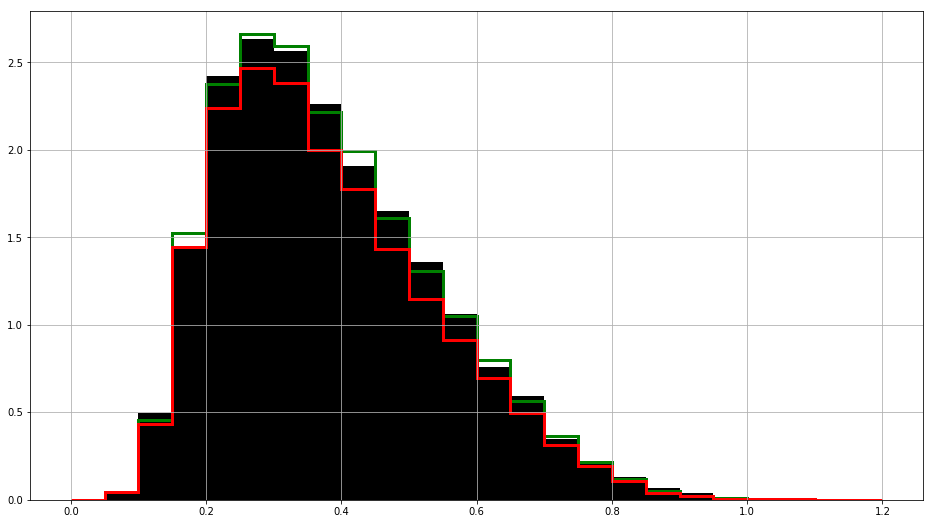

In [22]:
plt.figure(figsize=(16,9))
plt.hist(data_nSub_basis[:,4]/data_nSub_basis[:,1], color='k', bins=np.arange(0.,1.25,0.05), density=True)
plt.hist([TTbar_reco_nSub_basis[:,4]/TTbar_reco_nSub_basis[:,1],bkg_reco_nSub_basis[:,4]/bkg_reco_nSub_basis[:,1]], stacked=True, density=True, color=['r','g'], bins=np.arange(0.,1.25,0.05), histtype='step', lw=3)
plt.grid()
plt.show()

## 1-D unfolding of $N$-subjettiness ratios

### Simple unfolding of  $\tau_{2,1}^{(1)}$ [done without background subtraction or systematics here, the rest follows after this], here MC includes signal+background

In [23]:
MC_reco_tau21 = np.concatenate((TTbar_reco_tau21, ST1_reco_tau21,ST2_reco_tau21,ST3_reco_tau21,ST4_reco_tau21,ST5_reco_tau21,Wjets_reco_tau21))
MC_gen_tau21 = np.concatenate((TTbar_gen_tau21, ST1_gen_tau21,ST2_gen_tau21,ST3_gen_tau21,ST4_gen_tau21,ST5_gen_tau21,Wjets_gen_tau21))
data_tau21 = data_nSub_basis[:,4]/data_nSub_basis[:,1]
weights_MC = np.concatenate((weight_TTbar,weight_ST1,weight_ST2,weight_ST3,weight_ST4,weight_ST5,weight_Wjets))

Get the response matrix and input 1D distributions for unfolding.

In [24]:
print np.min(MC_gen_tau21)
print np.min(MC_reco_tau21)
print np.max(MC_gen_tau21)
print np.max(MC_reco_tau21)
print np.min(data_tau21)
print np.max(data_tau21)

0.033822936522658054
0.035494525811013096
1.2025826690775254
1.1682265240313252
0.05456939248542676
1.1363287927955423


#### Set the axis ranges for the generator and detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documentation + WG members

In [25]:
gen_bins = [x for x in np.linspace(num=9, start=0.1, stop=1.)]
gen_bins = np.concatenate((np.array([0.]), gen_bins, np.array([1.21])))
print gen_bins, gen_bins.shape[0]

det_bins = np.array([x for x in np.linspace(num=18, start=0.1, stop=1.)])
det_bins = np.concatenate((np.array([0., 0.05,]), det_bins, np.array([1.105, 1.21])))
print det_bins, det_bins.shape[0]

[0.     0.1    0.2125 0.325  0.4375 0.55   0.6625 0.775  0.8875 1.
 1.21  ] 11
[0.         0.05       0.1        0.15294118 0.20588235 0.25882353
 0.31176471 0.36470588 0.41764706 0.47058824 0.52352941 0.57647059
 0.62941176 0.68235294 0.73529412 0.78823529 0.84117647 0.89411765
 0.94705882 1.         1.105      1.21      ] 22


In [26]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

histMgenMC = ROOT.TH1D("histMgenMC", "histMgenMC; #tau_{2}^{1}; ",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC, MC_gen_tau21, weights=weights_MC)

histMdetMC = ROOT.TH1D("histMdetMC", "histMdetMC; #tau_{2}^{1}; ", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC, MC_reco_tau21, weights=weights_MC)

###use histMgenData in the following commented line for gen-lvl of another signal MC (for cross-closure)
###and histMdetData for the reco-level, whereas here we use 2016 data 

#histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{2}^{1}; ", gen_bins.shape[0]-1, (gen_bins))
#fill_hist(histMgenData, TTbartruth_nSub_basis[:,4]/TTbartruth_nSub_basis[:,1])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{2}^{1}; ", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetData, data_tau21)


response = ROOT.TH2D('response', 'response', det_bins.shape[0]-1, det_bins, gen_bins.shape[0]-1, gen_bins)
hist2Dfill = np.zeros((MC_reco_tau21.shape[0], 2))
hist2Dfill[:,0] = MC_reco_tau21.flatten()
hist2Dfill[:,1] = MC_gen_tau21.flatten()
fill_hist(response, hist2Dfill,weights_MC)

Set the X and Y axis labels

In [27]:
response.SetTitle(";#tau_{2,1}^{1}(det);#tau_{2,1}^{1}(gen)")

histMgenMC.SetTitle(";#tau_{2,1}^{1}(gen)")

histMdetMC.SetTitle(";#tau_{2,1}^{1}(det)")

#histMgenData.SetTitle(";#tau_{2,1}^{1}(gen)")

histMdetData.SetTitle(";#tau_{2,1}^{1}(det)")

### Normalizing the histograms by their integral, before filling response matrix

In [28]:
norm_genMC = histMgenMC.Integral()
print norm_genMC

norm_recoMC = histMdetMC.Integral()
print norm_recoMC

#norm_genData = histMgenData.Integral()
#print norm_genData

norm_detData = histMdetData.Integral()
print norm_detData

16034.7310739
16034.7310739
16482.0


In [29]:
histMgenMC.Scale(1./norm_genMC)
#histMgenData.Scale(1./norm_genData)
histMdetData.Scale(1./norm_detData)
histMdetMC.Scale(1./norm_recoMC)

#### Draw the variables at reco and gen level and for "data"

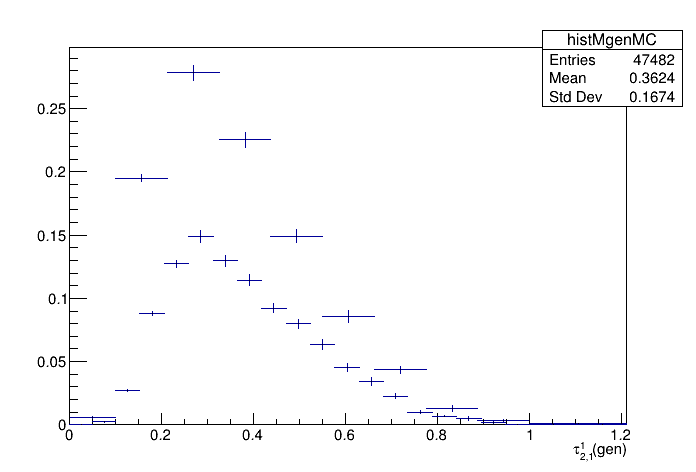

In [30]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
c1.SetTitle("Sig+Bkg MC")
histMgenMC.Draw("e")
histMdetMC.Draw("e same")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: chistMgenMC1


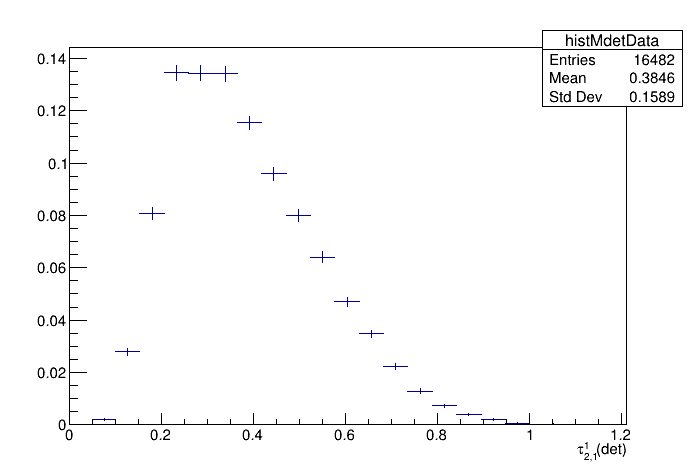

In [31]:
c1 = ROOT.TCanvas("chistMgenMC1", "chistMgenMC1")
#histMgenData.Draw("e")
histMdetData.Draw("e ")
c1.Draw()

## Nominal response matrix

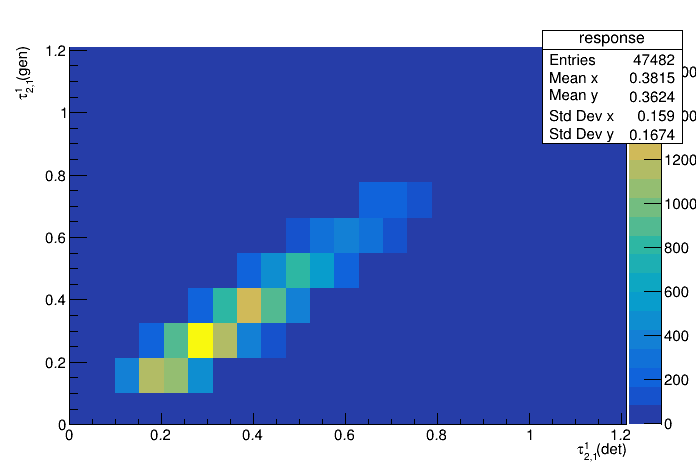

In [32]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

### Start unfolding: 

In [33]:
print 'getting tunfolder:'
tunfolder = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

getting tunfolder:


Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 21 input bins and 10 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{2,1}^{1}(gen)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #11 (yaxis:#tau_{2,1}^{1}(gen)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]


Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [34]:
print 'setting reco input'
tunfolder.SetInput( histMdetData )

setting reco input


1

Warning in <TUnfoldDensity::SetInput>: One input bin has zero error, and is ignored.


In [35]:
unfolded = tunfolder.DoUnfold(0.) #tau=0, ie, without regularisation
unfolded = tunfolder.GetOutput("unfolded")

In [36]:
#unfolding MC for sel-closure ratio test
print 'getting tunfolder:'
tunfolder_MC = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

getting tunfolder:


Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 21 input bins and 10 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{2,1}^{1}(gen)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #11 (yaxis:#tau_{2,1}^{1}(gen)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]


Set the input, a 1D reconstructed histogram from either MC (closure) or Data (measurement) , binned in the detector level binning.

In [37]:
print 'setting reco input'
tunfolder_MC.SetInput( histMdetMC )

setting reco input


0

In [38]:
unfolded_MC = tunfolder_MC.DoUnfold(0)
unfolded_MC = tunfolder_MC.GetOutput("unfolded_MC")

In [39]:
ROOT.gStyle.SetOptStat(0)

Info in <TCanvas::Print>: png file Tau21_unfolding_Escheme_nobkgsub.png has been created
Info in <TCanvas::Print>: pdf file Tau21_unfolding_Escheme_nobkgsub.pdf has been created


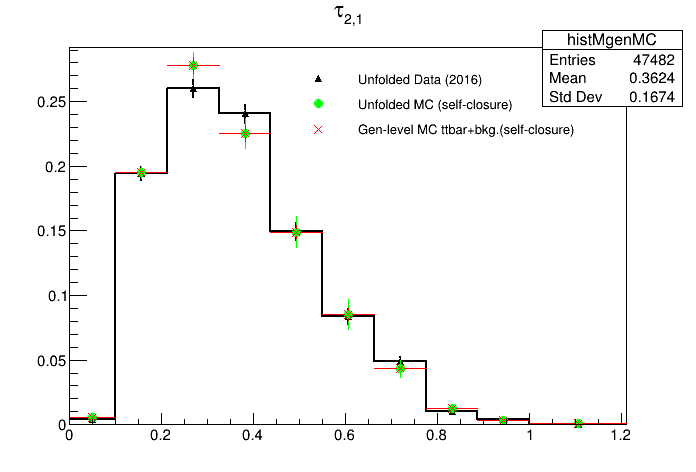

In [40]:
c5 = ROOT.TCanvas('c5', 'c5')
unfolded_MC.SetMarkerStyle(13)
unfolded_MC.SetMarkerColor(3)
unfolded_MC.SetLineColor(3)
unfolded_MC.SetLineWidth(1)

unfolded.SetMarkerStyle(22)
unfolded.SetMarkerColor(1)
unfolded.SetLineColor(1)
unfolded.SetLineWidth(2)
#unfolded.SetFillColor(0)
#histMgenData.SetMarkerStyle(4)
#histMgenData.SetMarkerColor(2)
#histMgenData.SetOption("E")
#histMgenData.SetLineColor(2)
histMgenMC.SetMarkerStyle(5)
histMgenMC.SetMarkerColor(2)
histMgenMC.SetLineColor(2)



hs = ROOT.THStack("#tau_{2,1}", "#tau_{2,1}")
#hs.SetMinimum()
hs.Add( unfolded, "E HIST")
hs.Add( unfolded_MC, "E ")
hs.Add(histMgenMC, "E")

leg0 = ROOT.TLegend(0.4, 0.7, 0.86, 0.86)
leg0.AddEntry( unfolded, "Unfolded Data (2016)", 'p')
leg0.AddEntry( unfolded_MC, "Unfolded MC (self-closure)", 'p')
leg0.AddEntry( histMgenMC, "Gen-level MC ttbar+bkg.(self-closure)", 'p')
leg0.SetLineColor(0)
leg0.SetBorderSize(0)
leg0.SetFillStyle(0)

#hs.Add(histMdetMC, "E")
#hs.Add(histMdetData, "E")
hs.Draw("nostack")
leg0.Draw()

c5.Draw()
c5.SaveAs("Tau21_unfolding_Escheme_nobkgsub.png")
c5.SaveAs("Tau21_unfolding_Escheme_nobkgsub.pdf")

#### Get self-closure ratio

In [41]:
ratio = ROOT.TH1D("","; #tau_{2,1}^{(1)}",  gen_bins.shape[0]-1, (gen_bins))
ratio.GetXaxis().SetTitle("#tau_{2,1}^{(1)}");
#ratio.GetYaxis().SetTitleOffset(0.);
ratio.GetYaxis().CenterTitle(ROOT.kTRUE);
ratio.GetXaxis().CenterTitle(ROOT.kTRUE);
ratio.GetYaxis().SetRangeUser(0.7,1.3)
ratio.Add(unfolded_MC)
ratio.GetYaxis().SetTitle("#frac{Unfolded Powheg}{Gen-level Powheg}")
ratio.Sumw2()
ratio.SetStats(0)
ratio.Divide(histMgenMC);
ratio.GetYaxis().SetLabelSize(0.09)
ratio.GetXaxis().SetLabelSize(0.09)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.12)
ratio.GetYaxis().SetTitleOffset(0.4)
ratio.GetXaxis().SetTitleSize(0.12)
ratio.GetXaxis().SetTitleOffset(0.85)

print "Bin Content", "\t", "Bin error", "\t", "Bin Center", "\t", "Bin Low-Edge", "\t", "Ratio to Truth for bin", "\t", "Ratio Error"
for i in xrange(1,gen_bins.shape[0]):
    print "%0.4f"%unfolded_MC.GetBinContent(i), "\t", "%0.4f"%unfolded_MC.GetBinError(i), "\t", unfolded_MC.GetBinCenter(i), "\t", unfolded_MC.GetBinLowEdge(i), "%0.4f"%ratio.GetBinContent(i), "%0.4f"%ratio.GetBinError(i)

Bin Content 	Bin error 	Bin Center 	Bin Low-Edge 	Ratio to Truth for bin 	Ratio Error
0.0058 	0.0010 	0.05 	0.0 1.0000 0.1927
0.1951 	0.0045 	0.15625 	0.1 1.0000 0.0274
0.2783 	0.0100 	0.26875 	0.2125 1.0000 0.0420
0.2255 	0.0116 	0.38125 	0.325 1.0000 0.0576
0.1491 	0.0118 	0.49375 	0.4375 1.0000 0.0866
0.0855 	0.0116 	0.60625 	0.55 1.0000 0.1458
0.0435 	0.0066 	0.71875 	0.6625 1.0000 0.1669
0.0126 	0.0025 	0.83125 	0.775 1.0000 0.2697
0.0035 	0.0030 	0.94375 	0.8875 1.0000 0.8920
0.0011 	0.0011 	1.105 	1.0 1.0000 0.9841


Info in <TCanvas::Print>: png file MC_SC_ratio_Escheme_nobkgsub.png has been created
Info in <TCanvas::Print>: pdf file MC_SC_ratio_Escheme_nobkgsub.pdf has been created


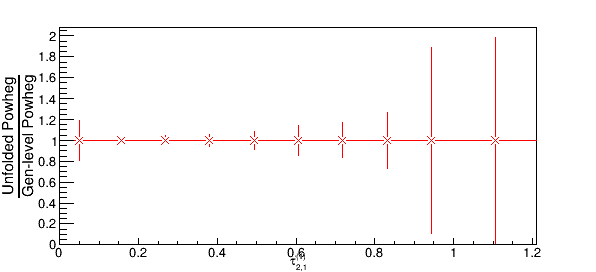

In [42]:
c6 = ROOT.TCanvas("c6","c6", 600,300)
ratio.GetYaxis().SetLabelSize(0.05)
ratio.GetXaxis().SetLabelSize(0.05)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerStyle(5)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.06)
ratio.GetYaxis().SetTitleOffset(0.7)
ratio.GetXaxis().SetTitleSize(0.05)
ratio.GetXaxis().SetTitleOffset(0.8)
#ratio.SetMinimum(0.7)
#ratio.SetMaximum(1.3)
#ratio.SetMarkerStyle(21);
ratio.Draw("ep")
c6.Draw()
c6.SaveAs("MC_SC_ratio_Escheme_nobkgsub.png")
c6.SaveAs("MC_SC_ratio_Escheme_nobkgsub.pdf")

# Unfolding $\tau_{2,1}^{(1)}$ with background subtraction

In [43]:
MC_sig_reco_tau21 = TTbar_reco_tau21
MC_sig_gen_tau21 = TTbar_gen_tau21

MC_bkg_reco_tau21 = np.concatenate((ST1_reco_tau21,ST2_reco_tau21,ST3_reco_tau21,ST4_reco_tau21,ST5_reco_tau21,Wjets_reco_tau21))
MC_bkg_gen_tau21 = np.concatenate((ST1_gen_tau21,ST2_gen_tau21,ST3_gen_tau21,ST4_gen_tau21,ST5_gen_tau21,Wjets_gen_tau21))

data_tau21 = data_nSub_basis[:,4]/data_nSub_basis[:,1]
weights_MC_sig = weight_TTbar
weights_MC_bkg = np.concatenate((weight_ST1,weight_ST2,weight_ST3,weight_ST4,weight_ST5,weight_Wjets))

Get the response matrix and input 1D distributions for unfolding.

In [44]:
print np.min(MC_sig_gen_tau21)
print np.min(MC_sig_reco_tau21)
print np.max(MC_sig_gen_tau21)
print np.max(MC_sig_reco_tau21), "\n"


print np.min(MC_bkg_gen_tau21)
print np.min(MC_bkg_reco_tau21)
print np.max(MC_bkg_gen_tau21)
print np.max(MC_bkg_reco_tau21), "\n"


print np.min(data_tau21)
print np.max(data_tau21)

0.033822936522658054
0.035494525811013096
1.2025826690775254
1.1682265240313252 

0.07700017812299854
0.07624753724962098
1.118227735899215
1.0541581340983461 

0.05456939248542676
1.1363287927955423


#### Set the axis ranges for the generator nd detector level distributions as well as the number of bins in each. Note that we want twice as many detector bins as generator level bins as recommended by the TUnfold documenation 

In [45]:
gen_bins = [x for x in np.linspace(num=9, start=0., stop=1.)]
gen_bins = np.concatenate((gen_bins, np.array([1.23])))
print gen_bins, gen_bins.shape[0]

det_bins = np.array([x for x in np.linspace(num=18, start=0.0, stop=1.)])
det_bins = np.concatenate((det_bins, np.array([1.115, 1.23])))
print det_bins, det_bins.shape[0]

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.    1.23 ] 10
[0.         0.05882353 0.11764706 0.17647059 0.23529412 0.29411765
 0.35294118 0.41176471 0.47058824 0.52941176 0.58823529 0.64705882
 0.70588235 0.76470588 0.82352941 0.88235294 0.94117647 1.
 1.115      1.23      ] 20


In [46]:
ROOT.TH1.SetDefaultSumw2()
from root_numpy import *

#### Fill histograms for sig and bkg. MC separately in this case (as one should!)

In [47]:
histMgenMC_bkg = ROOT.TH1D("histMgenMC_bkg", "histMgenMC_bkg; #tau_{2}^{1}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC_bkg, MC_bkg_gen_tau21, weights=weights_MC_bkg)

histMdetMC_bkg = ROOT.TH1D("histMdetMC_bkg", "histMdetMC_bkg; #tau_{2}^{1}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC_bkg, MC_bkg_reco_tau21, weights=weights_MC_bkg)

histMgenMC_sig = ROOT.TH1D("histMgenMC_sig", "histMgenMC_sig; #tau_{2}^{1}; Events/(0.02)",  gen_bins.shape[0]-1, (gen_bins))
fill_hist(histMgenMC_sig, MC_sig_gen_tau21, weights=weights_MC_sig)

histMdetMC_sig = ROOT.TH1D("histMdetMC_sig", "histMdetMC_sig; #tau_{2}^{1}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetMC_sig, MC_sig_reco_tau21, weights=weights_MC_sig)

#histMgenData = ROOT.TH1D("histMgenData", "histMgenData; #tau_{2}^{1}; Events/(0.02)", gen_bins.shape[0]-1, (gen_bins))
#fill_hist(histMgenData, TTbartruth_nSub_basis[:,4]/TTbartruth_nSub_basis[:,1])

histMdetData = ROOT.TH1D("histMdetData", "histMdetData; #tau_{2}^{1}; Events/(0.02)", det_bins.shape[0]-1, (det_bins))
fill_hist(histMdetData, data_tau21)


response = ROOT.TH2D('response', 'response', det_bins.shape[0]-1, det_bins, gen_bins.shape[0]-1, gen_bins)
hist2Dfill = np.zeros((MC_sig_reco_tau21.shape[0], 2))
hist2Dfill[:,0] = MC_sig_reco_tau21.flatten()
hist2Dfill[:,1] = MC_sig_gen_tau21.flatten()
fill_hist(response, hist2Dfill, weights_MC_sig)

Warning in <TROOT::Append>: Replacing existing TH1: histMdetData (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: response (Potential memory leak).


Set the X and Y axis labels

In [48]:
response.SetTitle(";#tau_{2,1}^{1}(det_sig);#tau_{2,1}^{1}(gen_sig)")


histMgenMC_bkg.SetTitle(";#tau_{2,1}^{1}(gen_bkg)")

histMdetMC_bkg.SetTitle(";#tau_{2,1}^{1}(det_bkg)")

histMgenMC_sig.SetTitle(";#tau_{2,1}^{1}(gen_sig)")

histMdetMC_sig.SetTitle(";#tau_{2,1}^{1}(det_sig)")

histMdetData.SetTitle(";#tau_{2,1}^{1}(data)")


Draw the variables at reco and gen level and for "data"

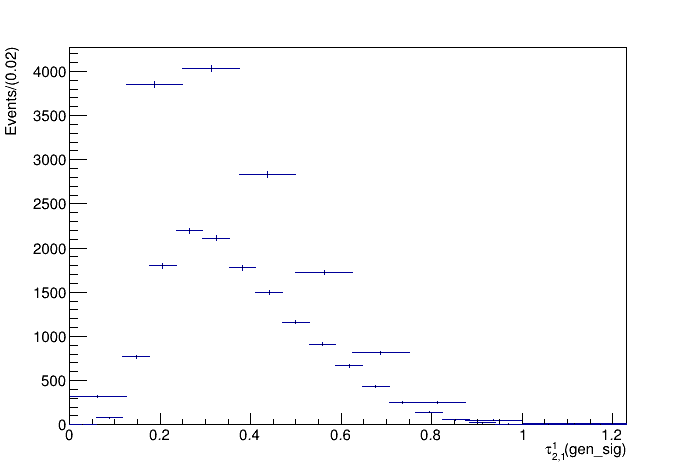

In [49]:
c1 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
histMgenMC_sig.Draw("e")
histMdetMC_sig.Draw("e same")
c1.Draw()

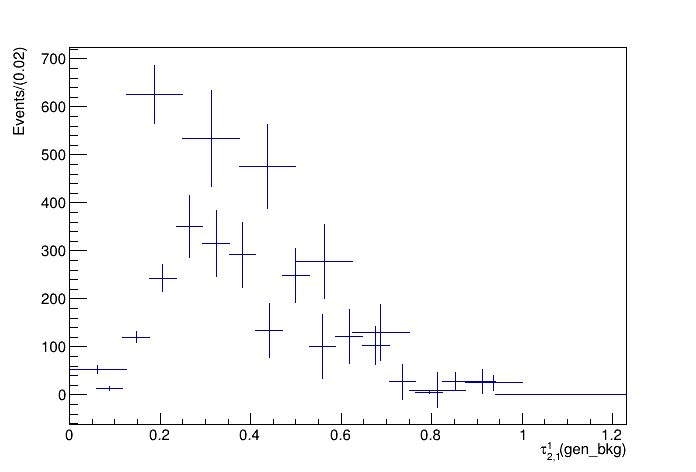

In [50]:
c1 = ROOT.TCanvas("chistMgenMC_bkg1", "chistMgenMC_bkg1")
histMgenMC_bkg.Draw("e")
histMdetMC_bkg.Draw("e same")
c1.Draw()

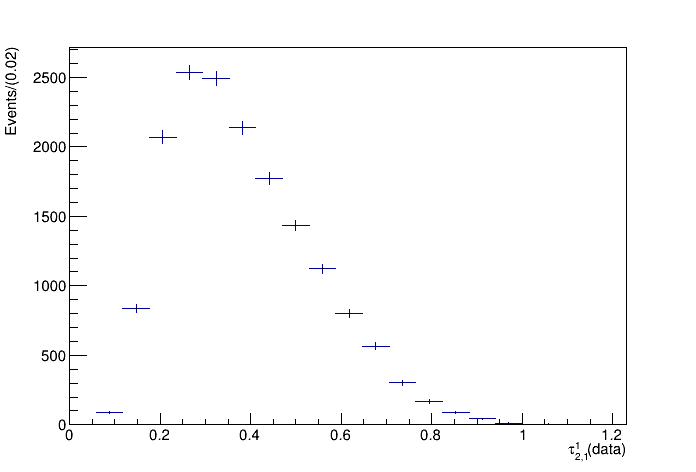

In [51]:
c1 = ROOT.TCanvas("chistMgenMC_sig1", "chistMgenMC_sig1")
#histMgenData.Draw("e")
histMdetData.Draw("e ")
c1.Draw()

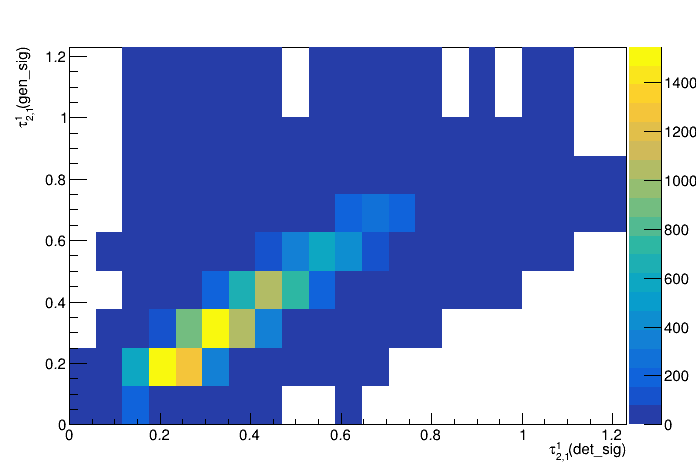

In [52]:
c1 = ROOT.TCanvas("cresponse1", "cresponse1")
response.Draw("colz")
c1.Draw()

In [53]:
print 'getting tunfolder:'

orientation = ROOT.TUnfoldDensity.kHistMapOutputHoriz
regMode = ROOT.TUnfoldDensity.kRegModeCurvature
con = ROOT.TUnfoldDensity.kEConstraintNone
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
errmode = ROOT.TUnfoldSys.kSysErrModeMatrix
#tunfolder_MC = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")
#tunfolder_data = ROOT.TUnfoldDensity(response, orientation, regMode, con, mode, "signal", "*[UOb]")

tunfolder_MC = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)
tunfolder_data = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert,ROOT.TUnfold.kRegModeCurvature, ROOT.TUnfold.kEConstraintNone, ROOT.TUnfoldDensity.kDensityModeBinWidth)

getting tunfolder:


Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 19 input bins and 9 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{2,1}^{1}(gen_sig)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (yaxis:#tau_{2,1}^{1}(gen_sig)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]
Info in <TUnfold::SetConstraint>: fConstraint=0
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 19 input bins and 9 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:#tau_{2,1}^{1}(gen_sig)[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (yaxis:#tau_{2,1}^{1}(gen_sig)[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[U

Set the input, a 1D reconstructed histogram from either MC_sig (closure) or Data (measurement) , binned in the detector level binning. Subtract background contributions from data, using reco-MC bkg.

In [54]:
print 'setting reco input'
tunfolder_data.SetInput( histMdetData )
tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

setting reco input


In [55]:
print 'setting reco MC input'
tunfolder_MC.SetInput( histMdetMC_sig )
#tunfolder_MC.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

setting reco MC input


0

In [56]:
unfolded_data = tunfolder_data.DoUnfold(0.)
unfolded_data = tunfolder_data.GetOutput("unfolded_data")

unfolded_MC = tunfolder_MC.DoUnfold(0.)
unfolded_MC = tunfolder_MC.GetOutput("unfolded_MC")

Warning in <TROOT::Append>: Replacing existing TH1: unfolded_MC (Potential memory leak).


In [57]:
ROOT.gStyle.SetOptStat(0)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5
Info in <TCanvas::Print>: png file Tau21_unfolding_Escheme_bkgsub.png has been created
Info in <TCanvas::Print>: pdf file Tau21_unfolding_Escheme_bkgsub.pdf has been created


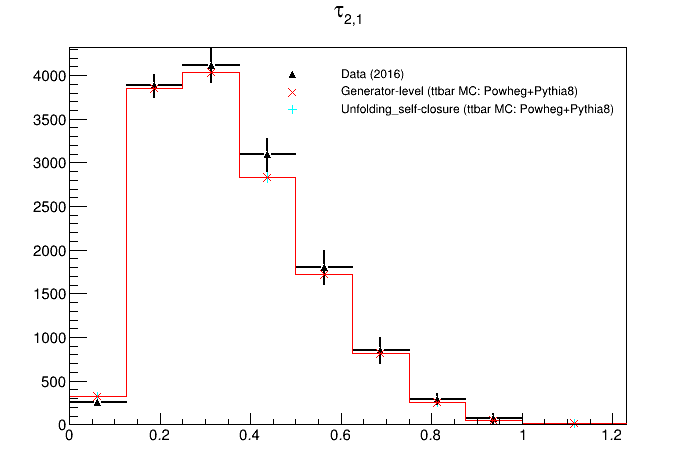

In [58]:
c5 = ROOT.TCanvas('c5', 'c5')

unfolded_MC.SetMarkerStyle(2)
unfolded_MC.SetMarkerColor(7)
unfolded_MC.SetLineColor(7)
unfolded_MC.SetLineWidth(1)

unfolded_data.SetMarkerStyle(22)
unfolded_data.SetMarkerColor(1)
unfolded_data.SetLineColor(1)
unfolded_data.SetLineWidth(2)


#unfolded_MC.SetFillColor(0)
#histMgenData.SetMarkerStyle(4)
#histMgenData.SetMarkerColor(2)
#histMgenData.SetOption("E")
#histMgenData.SetLineColor(2)
histMgenMC_sig.SetMarkerStyle(5)
histMgenMC_sig.SetMarkerColor(2)
histMgenMC_sig.SetLineColor(2)



hs = ROOT.THStack("#tau_{2,1}", "#tau_{2,1}")
#hs.Add
hs.SetMinimum(0)
#hs.Add( histMgenData, "E HIST")
hs.Add( unfolded_MC, "E HIST")
hs.Add( unfolded_data, "E ")
hs.Add(histMgenMC_sig, "E HIST")
#hs.Add(histMdetMC_sig, "E")
#hs.Add(histMdetData, "E")

leg0 = ROOT.TLegend(0.35, 0.75, 0.91, 0.86)
leg0.AddEntry( unfolded_data, "Data (2016)", 'p')
leg0.AddEntry( histMgenMC_sig, "Generator-level (ttbar MC: Powheg+Pythia8)", 'p')
#leg0.AddEntry( histMgenData, "'Truth' (MC: MG5+Pythia8)", 'p')
leg0.AddEntry( unfolded_MC, "Unfolding_self-closure (ttbar MC: Powheg+Pythia8)", 'p')
leg0.SetLineColor(0)
leg0.SetBorderSize(0)
leg0.SetFillStyle(0)

#hs.Add(histMdetMC, "E")
#hs.Add(histMdetData, "E")
hs.Draw("nostack")
leg0.Draw()

c5.Draw()
c5.SaveAs("Tau21_unfolding_Escheme_bkgsub.png")
c5.SaveAs("Tau21_unfolding_Escheme_bkgsub.pdf")

In [59]:
ratio = ROOT.TH1D("","; #tau_{2,1}^{(1)}",  gen_bins.shape[0]-1, (gen_bins))
ratio.GetXaxis().SetTitle("#tau_{2,1}^{(1)}");
#ratio.GetYaxis().SetTitleOffset(0.);
ratio.GetYaxis().CenterTitle(ROOT.kTRUE);
ratio.GetXaxis().CenterTitle(ROOT.kTRUE);
ratio.GetYaxis().SetRangeUser(0.7,1.3)
ratio.Add(unfolded_MC)
ratio.GetYaxis().SetTitle("#frac{Unfolded Powheg}{Gen-level Powheg}")
ratio.Sumw2()
ratio.SetStats(0)
ratio.Divide(histMgenMC_sig);
ratio.GetYaxis().SetLabelSize(0.09)
ratio.GetXaxis().SetLabelSize(0.09)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.12)
ratio.GetYaxis().SetTitleOffset(0.4)
ratio.GetXaxis().SetTitleSize(0.12)
ratio.GetXaxis().SetTitleOffset(0.85)

print "Bin Content", "\t", "Bin error", "\t", "Bin Center", "\t", "Bin Low-Edge", "\t", "Ratio to Truth for bin", "\t", "Ratio Error"
for i in xrange(1,gen_bins.shape[0]):
    print "%0.4f"%unfolded_MC.GetBinContent(i), "\t", "%0.4f"%unfolded_MC.GetBinError(i), "\t", unfolded_MC.GetBinCenter(i), "\t", unfolded_MC.GetBinLowEdge(i), "%0.4f"%ratio.GetBinContent(i), "%0.4f"%ratio.GetBinError(i)

Bin Content 	Bin error 	Bin Center 	Bin Low-Edge 	Ratio to Truth for bin 	Ratio Error
321.4796 	23.9577 	0.0625 	0.0 1.0000 0.0816
3852.6355 	58.4624 	0.1875 	0.125 1.0000 0.0179
4032.7664 	66.2512 	0.3125 	0.25 1.0000 0.0189
2836.0842 	59.7280 	0.4375 	0.375 1.0000 0.0238
1723.1687 	50.6351 	0.5625 	0.5 1.0000 0.0327
817.3932 	40.5193 	0.6875 	0.625 1.0000 0.0537
250.0685 	27.7461 	0.8125 	0.75 1.0000 0.1173
50.3523 	20.9666 	0.9375 	0.875 1.0000 0.4247
17.1890 	15.2005 	1.115 	1.0 1.0000 0.8957


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c6
Info in <TCanvas::Print>: png file MC_SC_ratio_Escheme_bkgsub.png has been created
Info in <TCanvas::Print>: pdf file MC_SC_ratio_Escheme_bkgsub.pdf has been created


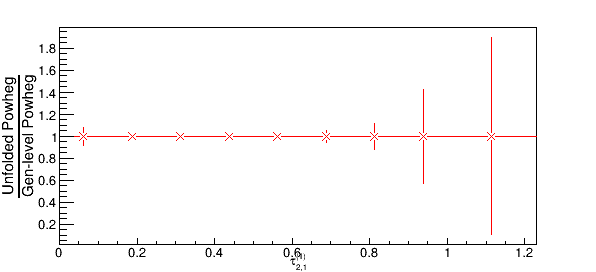

In [60]:
c6 = ROOT.TCanvas("c6","c6", 600,300)
ratio.GetYaxis().SetLabelSize(0.05)
ratio.GetXaxis().SetLabelSize(0.05)
#ratio.SetMarkerStyle(1)
ratio.SetMarkerStyle(5)
ratio.SetMarkerColor(ROOT.kRed)
ratio.SetLineColor(ROOT.kRed)
ratio.GetYaxis().SetTitleSize(0.06)
ratio.GetYaxis().SetTitleOffset(0.7)
ratio.GetXaxis().SetTitleSize(0.05)
ratio.GetXaxis().SetTitleOffset(0.8)
#ratio.SetMinimum(0.7)
#ratio.SetMaximum(1.3)
#ratio.SetMarkerStyle(21);
ratio.Draw("ep")
c6.Draw()
c6.SaveAs("MC_SC_ratio_Escheme_bkgsub.png")
c6.SaveAs("MC_SC_ratio_Escheme_bkgsub.pdf")

In [61]:
# get unfolding output
# includes the statistical and background errors
# but not the other systematic uncertainties
#tunfolder_data.SetInput( histMdetData )
tunfolder_data.SubtractBackground( histMdetMC_bkg, "bkg_all", 1. )

histUnfoldOutput= tunfolder_data.GetOutput("unfolded_data")

# retreive error matrix of statistical errors
histEmatStat=tunfolder_data.GetEmatrixInput("unfolding stat error matrix");
# retreive full error matrix
# This includes all systematic errors
histEmatTotal=tunfolder_data.GetEmatrixTotal("unfolding total error matrix");
# create two copies of the unfolded data, one with statistical errors
# the other with total errors
histUnfoldStat=ROOT.TH1D("tau21(unfold,staterr)",";tau21(gen)",  gen_bins.shape[0]-1, (gen_bins));
histUnfoldTotal=ROOT.TH1D("tau21(unfold,totalerr)",";tau21(gen)",  gen_bins.shape[0]-1, (gen_bins));

for i in xrange(0, gen_bins.shape[0]): 
    c=histUnfoldOutput.GetBinContent(i);
    # histogram with unfolded data and stat errors
    histUnfoldStat.SetBinContent(i,c);
    histUnfoldStat.SetBinError(i,np.sqrt(histEmatStat.GetBinContent(i,i)));
    # histogram with unfolded data and total errors
    histUnfoldTotal.SetBinContent(i,c);
    histUnfoldTotal.SetBinError(i,np.sqrt(histEmatTotal.GetBinContent(i,i)));

# create histogram with correlation matrix
histCorr=ROOT.TH2D("Corr(total)",";tau21(gen);tau21(gen)",  gen_bins.shape[0]-1, (gen_bins), gen_bins.shape[0]-1, (gen_bins));
for i in xrange(0, gen_bins.shape[0]): 
    ei,ej = 0,0
    ei=np.sqrt(histEmatTotal.GetBinContent(i,i));
    if(ei<=0.0): continue
    for j in xrange(0, gen_bins.shape[0]):
        ej=np.sqrt(histEmatTotal.GetBinContent(j,j));
        if(ej<=0.0): continue
        histCorr.SetBinContent(i,j,histEmatTotal.GetBinContent(i,j)/ei/ej);

# retreive bgr source 1
#histdetNormBgr1=tunfolder_data.GetBackground("bgr1 normalized", "background1");
histMdetNormBgrTotal=tunfolder_data.GetBackground("bkg_all");
#========================


Error in <TUnfoldDensity::SubtractBackground>: Source bkg_all given twice, ignoring 2nd call.

Warning in <TROOT::Append>: Replacing existing TH1: unfolded_data (Potential memory leak).


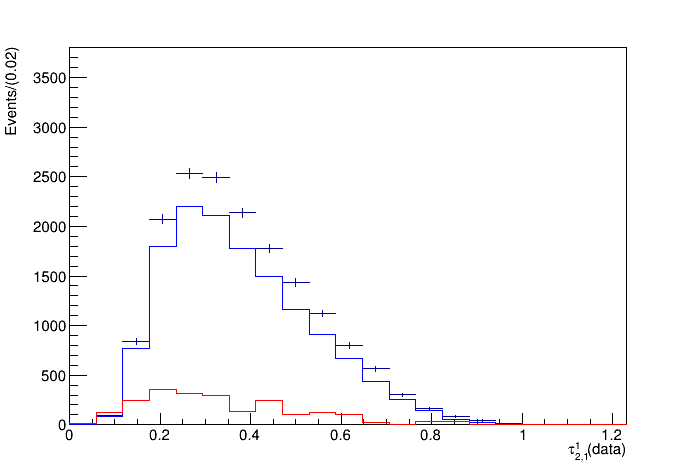

In [62]:
# Step 7: plots
output = ROOT.TCanvas();
#output.Divide(3,2);
#output.cd(1);
# data, MC prediction, background
histMdetData.SetMinimum(0.0);
histMdetData.SetMaximum(histMdetData.GetMaximum()*1.5);
histMdetData.Draw("E");
histMdetMC_sig.SetMinimum(0.0);
histMdetMC_sig.SetLineColor(ROOT.kBlue);
histMdetNormBgrTotal.SetLineColor(ROOT.kRed);
#histdetNormBgr1.SetLineColor(ROOT.kCyan);
histMdetMC_sig.Draw("SAME HIST");
#histdetNormBgr1.Draw("SAME HIST");
histMdetNormBgrTotal.Draw("SAME HIST");
output.Draw()

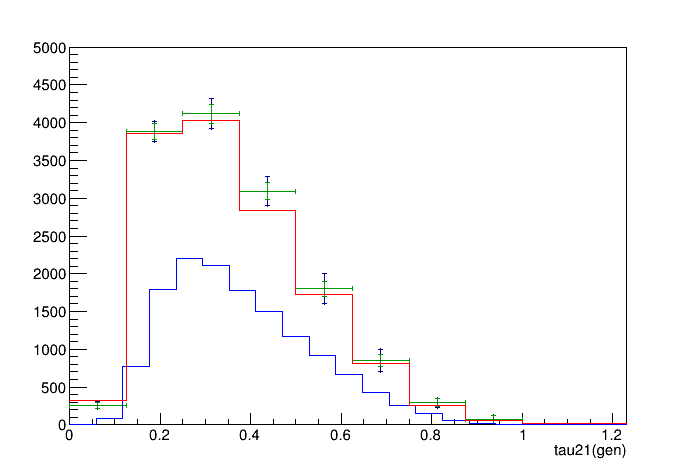

In [63]:
#output.cd(2)
# unfolded data, data truth, MC truth
output = ROOT.TCanvas();
histUnfoldTotal.SetMinimum(0.0);
histUnfoldTotal.SetMaximum(5000);
histUnfoldTotal.SetLineColor(ROOT.kBlue+3)
histUnfoldTotal.SetLineWidth(1)
# outer error: total error
histUnfoldTotal.Draw("E");
# middle error: stat+bgr
histUnfoldOutput.SetLineWidth(1)
histUnfoldOutput.Draw("SAME E1");
# inner error: stat only
histUnfoldStat.SetLineColor(ROOT.kGreen+2)
histUnfoldStat.Draw("SAME E1");

histMdetMC_sig.Draw("SAME HIST");
histMgenMC_sig.Draw("SAME HIST");
#histBbbSignalGen.SetLineColor(ROOT.kBlue);
#histBbbSignalGen.Draw("SAME HIST");
output.Draw()

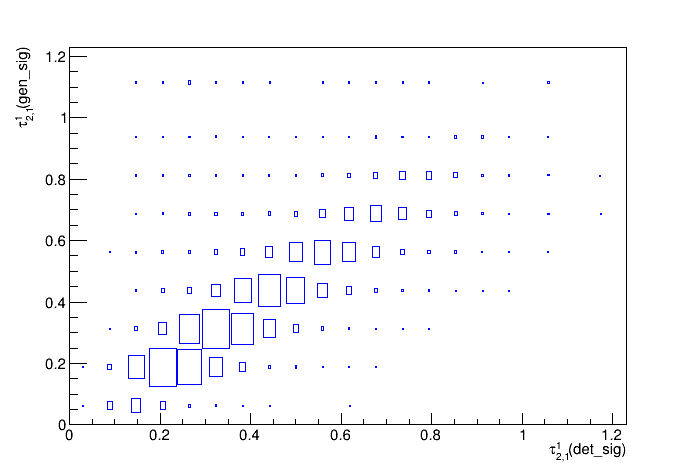

In [64]:
output.cd(3);
# unfolding matrix
response.SetLineColor(ROOT.kBlue);
response.Draw("BOX");

output.Draw()

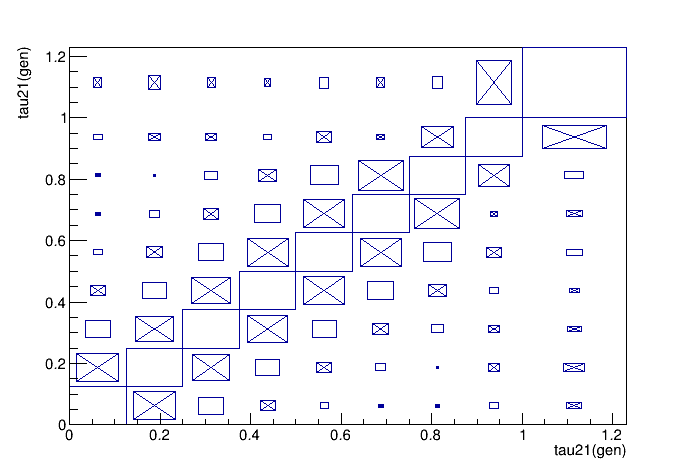

In [65]:
# show tau as a function of chi**2
output.cd(4);
#logTauX.Draw();
#bestLogTauLogChi2.SetMarkerColor(ROOT.kRed);
#bestLogTauLogChi2.Draw("*");
# show the L curve
output.cd(5);
#lCurve.Draw("AL");
#bestLcurve.SetMarkerColor(ROOT.kRed);
#bestLcurve.Draw("*");
# show correlation matrix
output.cd(6);
histCorr.Draw("BOX");
output.Draw()